# Introduction to Scikit-Learn (sklearn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 0. An end-to-end Scikit-Learn workflow

In [2]:
# 1.) Getting the data ready

heart_disease = pd.read_csv("heart-disease.csv")
heart_disease


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create Y (Labels matrix)
y = heart_disease["target"]

In [4]:
# 2.) Choose the right estimator/algorithm for our problem
# Choose the right model and hyper-parameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100) # default is 100

# We'll keep the default hyper-parameters
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3.) Fit the model to the training data
from sklearn.model_selection import train_test_split

# test_size=0.2, means 20% of the data will be used as test, and 80% will be used to train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
# Make a prediction
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [8]:
# 4.) Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [9]:
clf.score(X_test, y_test)

0.819672131147541

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.67      0.84      0.74        19
           1       0.92      0.81      0.86        42

    accuracy                           0.82        61
   macro avg       0.79      0.83      0.80        61
weighted avg       0.84      0.82      0.82        61



In [12]:
print(confusion_matrix(y_test, y_preds))

[[16  3]
 [ 8 34]]


In [13]:
accuracy_score(y_test, y_preds)

0.819672131147541

In [14]:
# 5. Improve the model
# Try different amount of n_estimators

np.random.seed(42)
# range(start, stop, step)
for i in range(10, 100, 10):
    print(f"Try model with {i} estimators.")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print(" ")

Try model with 10 estimators.
Model accuracy on test set: 73.77%
 
Try model with 20 estimators.
Model accuracy on test set: 81.97%
 
Try model with 30 estimators.
Model accuracy on test set: 72.13%
 
Try model with 40 estimators.
Model accuracy on test set: 83.61%
 
Try model with 50 estimators.
Model accuracy on test set: 80.33%
 
Try model with 60 estimators.
Model accuracy on test set: 78.69%
 
Try model with 70 estimators.
Model accuracy on test set: 83.61%
 
Try model with 80 estimators.
Model accuracy on test set: 78.69%
 
Try model with 90 estimators.
Model accuracy on test set: 83.61%
 


In [15]:
# 6.) Save the model and load it
import pickle 

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))


## Load our save model

In [16]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))

In [17]:
loaded_model.score(X_test, y_test)

0.8360655737704918

# Getting our data to be used in Machine Learning
TODO:
1. Split the data into features and labels (usually `X` and `y`)
2. Filling (also called imputing) or disregarding missing values.
3. Converting non-numerical values into numerical values (also called feature encoding).

In [18]:
from sklearn.model_selection import train_test_split

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## Make sure it's all numeric data (Car sales extended)

In [20]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [21]:
len(car_sales)

1000

In [22]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [23]:
# Split in X and y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
# Build the model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)
model.predict(X_test, y_test)


ValueError: could not convert string to float: 'Toyota'

In [ ]:
X.head()

In [ ]:
# Let's fix the error above

# Turn the catergories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X # np.ndarray
pd.DataFrame(transformed_X)


In [ ]:
# np.random.seed() will make the model.score() reproducible (does not change on every run).
# try removing np.random.seed() and observe the model.score() output on every refresh.
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [25]:
import sklearn
print(sklearn.__version__)

1.4.2


## What if there were missing values

In [26]:
car_sale_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sale_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [27]:
# 
car_sale_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [28]:
X = car_sale_missing.drop("Price", axis=1)
y = car_sale_missing["Price"]


## Fill missing data using Pandas

In [29]:
# fill the "Make" column
car_sale_missing["Make"].fillna("missing", inplace=True)

# fill the "Colour" column
car_sale_missing["Colour"].fillna("missing", inplace=True)

# fill the "Odometer (KM)" column
car_sale_missing["Odometer (KM)"].fillna(car_sale_missing["Odometer (KM)"].mean(), inplace=True)

# fill the "Doors" column
car_sale_missing["Doors"].fillna(4, inplace=True)

C:\Users\Paul\AppData\Local\Temp\ipykernel_15532\3129724733.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sale_missing["Make"].fillna("missing", inplace=True)
C:\Users\Paul\AppData\Local\Temp\ipykernel_15532\3129724733.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [30]:
car_sale_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [31]:
# drop NA values all column
car_sale_missing.dropna(inplace=True)

In [32]:
car_sale_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [33]:
len(car_sale_missing)

950

In [34]:
# Turn the catergories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X # np.ndarray
pd.DataFrame(transformed_X)

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
995,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
996,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 11)\t1.0\n..."
997,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
998,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


## Fill missing values using Scikit-Learn

In [35]:
import pandas as pd

In [36]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [37]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [38]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [39]:
# drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [40]:
# Split
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [41]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" and numerical values with the mean()
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create imputer
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [42]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [43]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [44]:
# Turn the catergories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X # np.ndarray

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [45]:
# Now we've got our data as numbers and filled
# let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,y, test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

# Choosing the right estimator/algorithm for your problem
- Classification problem - predicting a category
- Regression problem - predicting a number

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### Picking a machine learning model for a regression problem


In [46]:
# use california houseing data set from sklearn
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)

(20640, 8) (20640,)


In [47]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [48]:
# Let's use the feature to predict the "target"

# convert to pd.DataFrame
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [49]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [50]:

from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100k

# Split data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Select the model
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.5758549611440128

What if Ridge() didn't work or the score didn't fit our needs? - We could always try a different model.

How about we try an ensemble model (an ensemble is a combination of smaller models to try and make better predictions
than just a single model)

Ensemble models can be found here.
https://scikit-learn.org/stable/modules/ensemble.html


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8065734772187598

# Choosing an estimator for a Classification problem

### Check the map
https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [52]:
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
# Consulting the map. it says that we can use LinearSVC estimator
from sklearn.svm import LinearSVC

np.random.seed(42)

# Create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearSVC(dual=False, max_iter=1000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.8688524590163934

In [54]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [55]:
# Try Ensemble Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.8524590163934426

## Different names for
- X = features, features variable, data
- y= labels, targets, target variables, ground truth
- model.fit() # Training the model
- model.score() # use the patterns the model has learned


## Make predictions using our trained model

2 Ways to make a prediction

* 1.) using predict() function
* 2.) using predict_proba() function

In [56]:
# 1. Using predict()
# Try Ensemble Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
# model.score(X_test, y_test)
y_preds = model.predict(X_test)
np.mean(y_preds == y_test) # result is equal to model.score(X_test, y_test)

0.8524590163934426

In [57]:
model.score(X_test, y_test)

0.8524590163934426

In [58]:
model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [59]:
model.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [60]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
y_preds[:10]
# np.mean(y_preds == y_test)

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [62]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [63]:
len(y_preds), len(y_test)

(4128, 4128)

In [64]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

# Evaluating a Machine Learning model
Three ways to evaluate a machine learning model
1. The estimator's built-n score() method.
2. The scoring parameter
3. Problem-specific metric function

https://scikit-learn.org/stable/modules/model_evaluation.html

## Evaluating a model using the score() method.

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)



RandomForestClassifier()

In [66]:
clf.score(X_train, y_train)

1.0

In [67]:
clf.score(X_test, y_test)

0.8524590163934426

## Using the score method in a Regression problem

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000)

In [69]:
model.score(X_train, y_train)

0.974661130523898

In [70]:
model.score(X_test, y_test)

0.8083212359139857

# Evaluating a model using the scoring parameter

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train);

In [72]:
clf.score(X_test, y_test)

0.8524590163934426

In [73]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [74]:
clf_single_score = clf.score(X_test, y_test)
clf_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

clf_single_score, clf_val_score

(0.8524590163934426, 0.8182513661202184)

# Classification model evaluation metrics
1. Accuracy
2. Area under Receiving Operating Characteristic (ROC) curve aka Area Under Curve (AUC)
3. Confusion Matrix
4. Classification Report

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)


RandomForestClassifier()

In [76]:
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [77]:
clf_cros_val_score = np.mean(cross_val_score(clf, X, y, cv=5, scoring=None))
print(f"Heart disease classifier Cross-Validated Score: {clf_cros_val_score*100:.2f}%")

Heart disease classifier Cross-Validated Score: 81.84%


# AUC/ROC
ROC curves are a comparison of a models true positive rate versus a models false positive rate.
* true positive = model predicts 1, truth is 1
* false positive = model predicts 1, truth is 0
* true negative = model predicts 0, truth is 0
* false negative = model predicts 0, truth is 1
  

In [78]:
from sklearn.metrics import roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)


RandomForestClassifier()

In [79]:
# ROC
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [80]:
y_probs_positive = y_probs[:,1] # get the right side, 1
y_probs_positive[:10]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
# check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

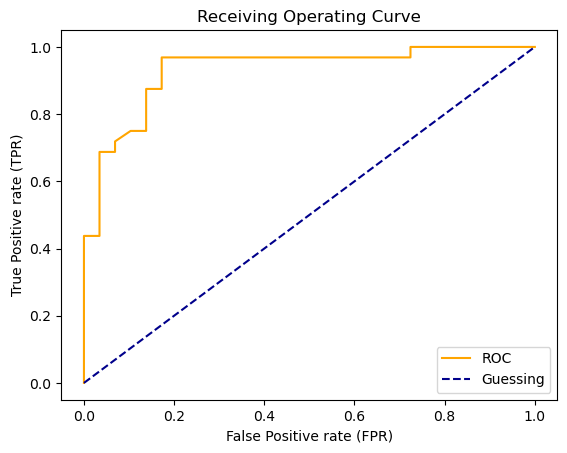

In [81]:
# Create a custom function to plot the results
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """ 
    Plot an ROC give fpr and tpr
    """
    # Clreate the plot
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    # Customize the plot
    plt.xlabel("False Positive rate (FPR)")
    plt.ylabel("True Positive rate (TPR)")
    plt.title("Receiving Operating Curve")
    plt.legend()
    plt.show()
    
# Call our function
plot_roc_curve(fpr, tpr)
    

In [82]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

## Confusion matrix

* Confusion matrix - a confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was suppose to predict.

In essense, giving you an idea where the model is getting confused.

In [83]:
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [84]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [85]:
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [86]:
# Visualize using pd.crosstab

pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,24,5
1,4,28


In [87]:
24 + 5 + 4 + 28, len(y_preds)

(61, 61)

## Installing a missing package from Jupyter Notebook

In [88]:
import sys
# sys.prefix will be (c:\PAUL\AI_ML_COURSE\sample_project\env)
!conda install --yes --prefix {sys.prefix} seaborn
#!dir

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



## Using Seaborn

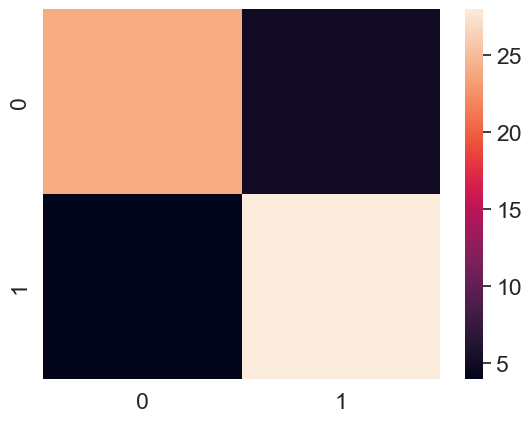

In [89]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_preds)
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix);

Confusion matrix - a confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was suppose to predict.

In essense, giving you an idea where the model is getting confused.

## Creating a confusion matrix using scikit-learn
You will need Scikit-Learn 1.0+

In [90]:
import sklearn
sklearn.__version__

'1.4.2'

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

RandomForestClassifier()

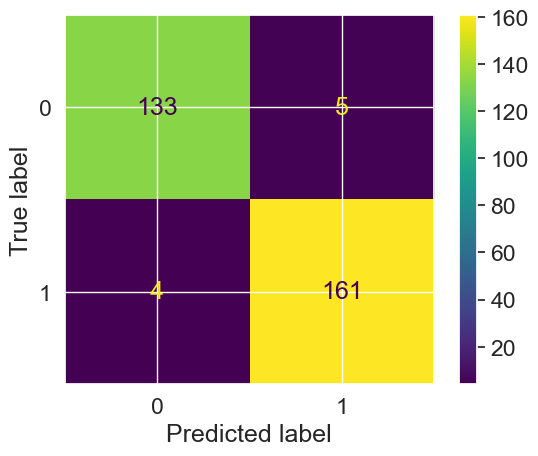

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

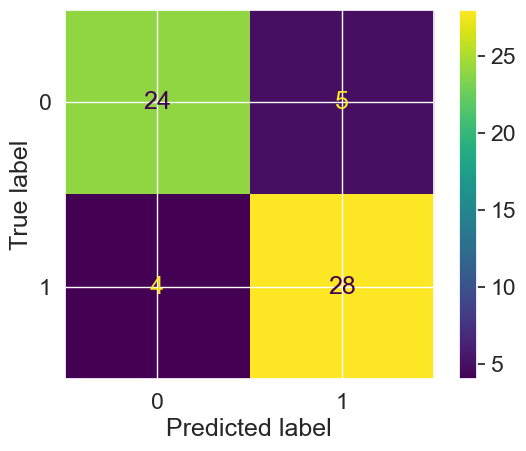

In [93]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                        y_pred=y_preds
                      );

## Classification Report

In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

1. R^2 (R-squared) or coefficient of determination
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)




RandomForestRegressor()

In [96]:
model.score(X_test, y_test)

0.8065734772187598

In [97]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [98]:
y_test.mean()

2.0550030959302323

In [99]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

In [100]:
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [101]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

## Mean Absolute Error (MAE)
It gives you an idea of how wrong your model's predictions are.

In [102]:
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

### How MAE is calculated

In [103]:
import pandas as pd

df = pd.DataFrame(data={
    "Actual Values": y_test,
    "Predicted Values": y_preds
})
df["Difference"] = df["Actual Values"] - df["Predicted Values"]
df.head()
# compare the MAEs
(np.abs(df["Difference"]).mean(), mae)

(0.32659871732073664, 0.32659871732073664)

### Mean Squared Error (MSE)

In [104]:
## MSE is the mean (average) of the square of the error bet actual and predicted values.
from sklearn.metrics import mean_squared_error 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse


0.2534678520824551

## Using the `Scoring parameter`
1. [ https://scikit-learn.org/stable/modules/model_evaluation.html ]
2. [ https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values ]

In [105]:
[ https://scikit-learn.org/stable/modules/model_evaluation.html ]
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

SyntaxError: invalid syntax (3871456290.py, line 1)

In [ ]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # if scoring=None, estimator's default scoring evaluation metric is used (accuracy for classification models)
cv_acc

In [ ]:
# Cross-validated accuracy
print(f"Cross-validated accuracy is: {np.mean(cv_acc) * 100:.2f}%")

In [ ]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy") # if scoring=None, estimator's default scoring evaluation metric is used (accuracy for classification models)
cv_acc

In [ ]:
# Cross-validated accuracy
print(f"Cross-validated accuracy is: {np.mean(cv_acc) * 100:.2f}%")

In [ ]:
# using Precision scoring
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

In [ ]:
print(f"Cross-validated precision scoring: {np.mean(cv_precision)*100:.2f}%")

In [ ]:
# using Recall scoring
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

In [ ]:
print(f"Cross-validate recall scoring: {np.mean(cv_recall)*100:.2f}%")

# Using cross validation with Regression models

In [106]:
##
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.8065734772187598

In [107]:
# using cross validation
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None) # default is r2 aka coefficianet of determination
cv_r2

array([0.6242781 , 0.72456321, 0.61847299])

In [108]:
print(f"Cross-validated using r2 aka coefficient of determination: {np.mean(cv_r2)*100:.2f}%")

Cross-validated using r2 aka coefficient of determination: 65.58%


In [109]:
# Using mean squared error
cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
cv_mae

array([-0.51530872, -0.42365146, -0.50463115])

In [110]:
print(f"Cross-validated using mean absolute error: {np.mean(cv_mae)*100:.2f}%")

Cross-validated using mean absolute error: -48.12%


In [111]:
# Using mean squared error , closer to zero the better
cv_mse = cross_val_score(model, X, y, scoring="neg_mean_squared_error")
cv_mse

array([-0.52892105, -0.34987537, -0.37612477, -0.44600505, -0.4656147 ])

In [112]:
print(f"Cross-validated using mean squared error: {np.mean(cv_mse)*100:.2f}%")

Cross-validated using mean squared error: -43.33%


## Using different evaluation metrics as Scikit-learn functions

## Classification models

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)



In [114]:
# Accuracy_score
acc_score = accuracy_score(y_test, y_preds)
acc_score

0.8524590163934426

In [115]:
# Precision score
prec_score = precision_score(y_test, y_preds)
prec_score

0.8484848484848485

In [116]:
# Recall score
rec_score = recall_score(y_test, y_preds)
rec_score

0.875

In [117]:
# f1 score
f_1_score = f1_score(y_test, y_preds)
f_1_score

0.8615384615384616

## Regression Models

In [118]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

In [119]:
# r2_score
r_2_score = r2_score(y_test, y_preds)
r_2_score

0.8065734772187598

In [120]:
# mean absolute error
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [122]:
# mean squared error
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

## Improving a model
    First predictions = base predictions
    First model = baseline model

Improving from a data perspective
* Could we collect more data? Generally the more data, the better.
* Could we improve our data?

Improving from a model perspective
* Is there a better model we could use?
* Could we improve our current model?

Parameters vs Hyperparameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns.
    

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

heart_disease = pd.read_csv("heart-disease.csv")

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [4]:
## Finding the hyperparameters of a model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Tuning hyper-parameters by hand. 

Let's make 3 sets.

We are going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`


In [6]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels and y_preds labels
    on a classification model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")

    return metric_dict

In [7]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [50]:
# train_test_split() only splits the data into two, namely, train and test.
# We will manually spit the data to train, validation, and test.
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)
# Split to X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]
# Split the data into train, validation, and test
train_split = round(0.7 * len(heart_disease_shuffled))
validation_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:validation_split], y[train_split:validation_split]
X_test, y_test = X[validation_split:], y[validation_split:]

clf = RandomForestClassifier(n_estimators=100, max_depth=5)
clf.fit(X_train, y_train)
# Make baseline predictions
y_preds = clf.predict(X_valid)
# Make baseline metrics
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics;

Accuracy: 84.44%
Precision: 0.82
Recall: 0.92
F1: 0.87


In [72]:
clf2 = RandomForestClassifier(n_estimators=1000)
clf2.fit(X_train, y_train)
# Make baseline predictions
y_preds_2 = clf2.predict(X_valid)
# Make baseline metrics
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics;

Accuracy: 93.33%
Precision: 0.92
Recall: 0.96
F1: 0.94


In [42]:
clf3 = RandomForestClassifier(n_estimators=10)
clf3.fit(X_train, y_train)
# Make baseline predictions
y_preds_3 = clf3.predict(X_valid)
# Make baseline metrics
baseline_metrics = evaluate_preds(y_valid, y_preds_3)

Accuracy: 80.00%
Precision: 0.81
Recall: 0.84
F1: 0.82


## Hyperparameters tuning using RandomizedSearchCV (Randomized Search Cross-validation)

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# create a dictionary of the parameters that we want to adjust
grid = {
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["log2", "sqrt" ],
    "min_samples_leaf": [1, 2, 4],
    "min_samples_split": [2, 4, 6],
    "n_estimators": [10, 100, 200, 500, 1000, 1200]  
}

np.random.seed(42)

# Data
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV()
rs_clf = RandomizedSearchCV(estimator = clf,
                          param_distributions = grid,
                          n_iter = 10, # number of models to try
                          cv = 5, # 5-fold cross validation
                          verbose = 2)

# Fit the RandomizedSearchCV
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [57]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [62]:
# Make predictions with the best hyperparamenters
rs_y_preds = rs_clf.predict(X_test)
# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)
rs_metrics;

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1: 0.81


### Did we make an improvement?

#### Results before RandomizedSearchCV
* Accuracy: 84.44%
* Precision: 0.82
* Recall: 0.92
* F1: 0.87
#### Results after RandomizedSearchCV
* Accuracy: 81.97%
* Precision: 0.77
* Recall: 0.86
* F1: 0.81



## Hyperparameters tuning using GridSearchCV (Grid Search Cross-validation)

In [69]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Split
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

grid_2 = {
    "max_depth": [None],
    "max_features": ["log2", "sqrt" ],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [6],
    "n_estimators": [100, 200, 500]  
}

gs_clf = GridSearchCV(
    estimator=clf,
    param_grid=grid_2,
    cv = 5, # 5-fold cross validation
    verbose = 2)

gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [70]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [71]:
# make predictions
gs_y_preds = gs_clf.predict(X_test)
# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)
gs_metrics;


Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


### Let's compare our different models

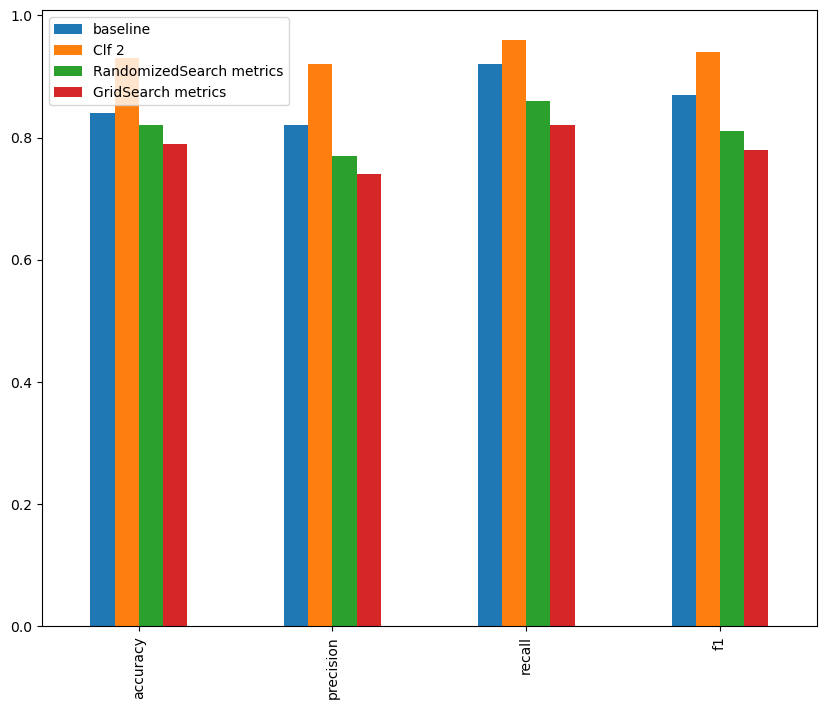

In [79]:
# import matplotlib.pyplot as plt
# %matplotlib inline
import pandas as pd

compare_metrics = pd.DataFrame({
    "baseline":baseline_metrics,
    "Clf 2": clf_2_metrics,
    "RandomizedSearch metrics": rs_metrics,
    "GridSearch metrics": gs_metrics
})

compare_metrics.plot.bar(figsize=(10,8));

## Saving and loading out trained model

## Using pickle


In [80]:
import pickle
pickle.dump(gs_clf, open("gs_clf_random_forest.pkl" ,"wb"))

In [82]:
# Load a trained model
loaded_pickle_model = pickle.load(open("gs_clf_random_forest.pkl", "rb"))

In [86]:
# make predictions using the loaded model
pickle_y_preds = loaded_pickle_model.predict(X_test)
pickle_metrics = evaluate_preds(y_test, pickle_y_preds)
pickle_metrics

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

### Compare the loaded model's results to our original results
Original:

    Accuracy: 78.69%
    Precision: 0.74
    Recall: 0.82
    F1: 0.78

Loaded model:

    Accuracy: 78.69%
    Precision: 0.74
    Recall: 0.82
    F1: 0.78

## Using joblib module

In [89]:
from joblib import dump, load
dump(gs_clf, open("gs_clf_random_forest.joblib" ,"wb"))


In [90]:
# Load a trained model
loaded_joblib_model = load(open("gs_clf_random_forest.joblib", "rb"))

In [92]:
# make predictions using the loaded model
joblib_y_preds = loaded_joblib_model.predict(X_test)
joblib_metrics = evaluate_preds(y_test, joblib_y_preds)
joblib_metrics

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

# Putting it all together

In [95]:
import pandas as pd

# imort our data
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [97]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

## Things we want to do
1. Fill in missing data
2. Convert data to numbers (OneHotEncoder)
3. Build models with the data

In [106]:
# Get the data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# modeling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np

np.random.seed(42)

# Import data and drop columns with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numerical_feature = ["Odometer (KM)"]
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values then convert to numbers)
preprocessor = ColumnTransformer(
    transformers = [
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("numerical", numerical_transformer, numerical_feature)
    ]
)

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)
model.score(X_test, y_test)


0.22188417408787875

It's also possible to use GridSearchCV and RandomSearchCV with our pipeline 

In [111]:
# Use GridSearchCV with our RegressionPipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__numerical__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["log2", "sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['log2', 'sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__numerical__imputer__strategy': ['mean',
                                                                        'median']},
             verbose=2)

In [112]:
gs_model.score(X_test, y_test)

0.28553567798887214

From 0.22188417408787875 to 0.28553567798887214